In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
df = pd.read_csv("Datasets/link2/hiring.csv")

In [12]:
df.head()

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,5.0,8.0,6,45000
2,2.0,6.0,7,60000
3,7.0,10.0,10,65000
4,3.0,9.0,6,70000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      float64
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 384.0 bytes


In [14]:
df.value_counts()

experience  test_score  interview_score  salary
2.0         6.0         7                60000     1
3.0         9.0         6                70000     1
5.0         8.0         6                45000     1
7.0         10.0        10               65000     1
10.0        7.0         10               62000     1
dtype: int64

In [15]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

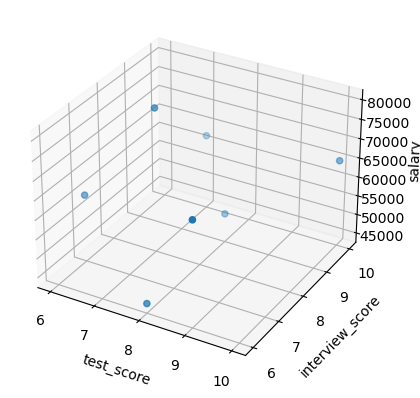

In [16]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(df['test_score'],df['interview_score'],df['salary'])
plt.xlabel("test_score")
plt.ylabel("interview_score")
ax.set_zlabel("salary")
plt.show()
# sns.scatter3d(data = df,x = "Mileage",y = "Age(yrs)",z = "Sell Price($)")

[Text(0, 0, '2.0'),
 Text(1, 0, '3.0'),
 Text(2, 0, '5.0'),
 Text(3, 0, '7.0'),
 Text(4, 0, '10.0'),
 Text(5, 0, '11.0')]

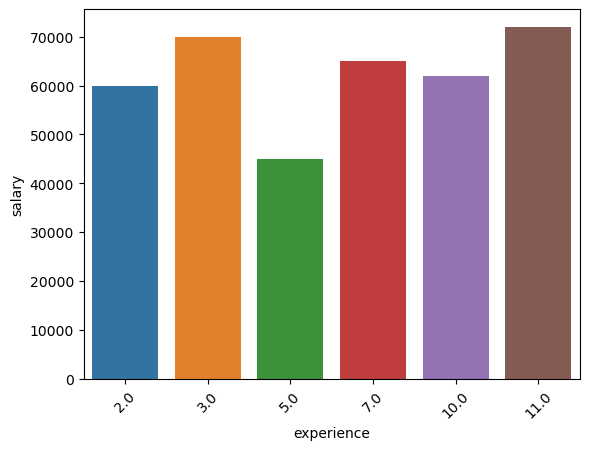

In [17]:
plot = sns.barplot(data = df,x = "experience",y = "salary")#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

In [18]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [19]:
df.corr()

,experience,test_score,interview_score,salary
experience,1.000000,0.147799,0.517129,0.301302
test_score,0.147799,1.000000,0.143066,-0.003004
interview_score,0.517129,0.143066,1.000000,0.037820
salary,0.301302,-0.003004,0.037820,1.000000


In [20]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values = np.nan,strategy = 'median')
df = imp.fit_transform(df)
df

array([[6.0e+00, 8.0e+00, 9.0e+00, 5.0e+04],
       [5.0e+00, 8.0e+00, 6.0e+00, 4.5e+04],
       [2.0e+00, 6.0e+00, 7.0e+00, 6.0e+04],
       [7.0e+00, 1.0e+01, 1.0e+01, 6.5e+04],
       [3.0e+00, 9.0e+00, 6.0e+00, 7.0e+04],
       [1.0e+01, 7.0e+00, 1.0e+01, 6.2e+04],
       [1.1e+01, 8.0e+00, 7.0e+00, 7.2e+04],
       [6.0e+00, 7.0e+00, 8.0e+00, 8.0e+04]])

In [21]:
df = pd.DataFrame(data = df,columns = ['experience','test_score','interview_score','salary'])
df

,experience,test_score,interview_score,salary
0,6.0,8.0,9.0,50000.0
1,5.0,8.0,6.0,45000.0
2,2.0,6.0,7.0,60000.0
3,7.0,10.0,10.0,65000.0
4,3.0,9.0,6.0,70000.0
5,10.0,7.0,10.0,62000.0
6,11.0,8.0,7.0,72000.0
7,6.0,7.0,8.0,80000.0


Hence there is no null element.

In [22]:
y = df.iloc[:,-1].values
X = df.drop(['salary'], axis = 1)
X

,experience,test_score,interview_score
0,6.0,8.0,9.0
1,5.0,8.0,6.0
2,2.0,6.0,7.0
3,7.0,10.0,10.0
4,3.0,9.0,6.0
5,10.0,7.0,10.0
6,11.0,8.0,7.0
7,6.0,7.0,8.0


In [23]:
y= y.reshape(-1,1)

In [24]:
y

array([[50000.],
       [45000.],
       [60000.],
       [65000.],
       [70000.],
       [62000.],
       [72000.],
       [80000.]])

In [25]:
X.head()

,experience,test_score,interview_score
0,6.0,8.0,9.0
1,5.0,8.0,6.0
2,2.0,6.0,7.0
3,7.0,10.0,10.0
4,3.0,9.0,6.0


Splitting

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [27]:
import matplotlib.pyplot as plt

In [28]:
reg.predict(X).reshape(-1,1)

array([[62121.86086789],
       [62903.01164245],
       [59748.340229  ],
       [62304.24324064],
       [60979.31299913],
       [65317.37708073],
       [67852.11199846],
       [62773.74194169]])

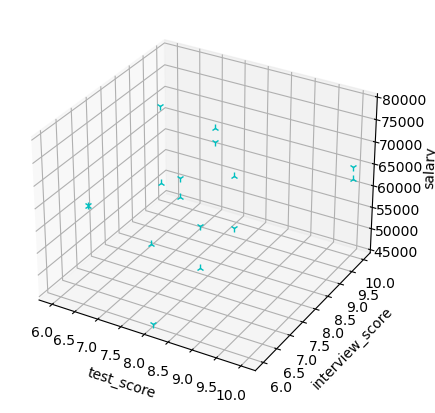

In [30]:
f,ax=plt.subplots(subplot_kw={"projection":"3d"})
f.set_figwidth(5)
f.set_figheight(5)
ax.plot(df['test_score'],df['interview_score'],df['salary'],'c1',label='actual')
ax.plot(df['test_score'],df['interview_score'],pd.DataFrame(reg.predict(X).reshape(-1,1),columns=['salary'])['salary'],'c2',label = 'Predict')
plt.xlabel("test_score")
plt.ylabel("interview_score")
ax.set_zlabel("salary")
plt.show()

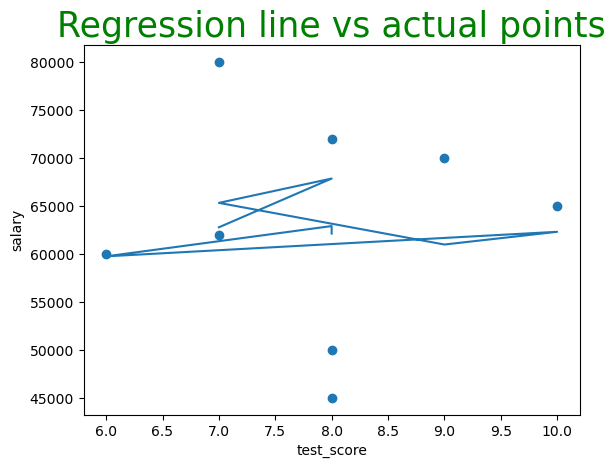

In [33]:
plt.title("Regression line vs actual points",fontsize = 25,color='green')
plt.ylabel("salary")
plt.xlabel("test_score")
plt.scatter(X['test_score'],pd.DataFrame(y,columns=['salary'])['salary'])
plt.plot(X['test_score'],pd.DataFrame(reg.predict(X),columns=['salary'])['salary'])

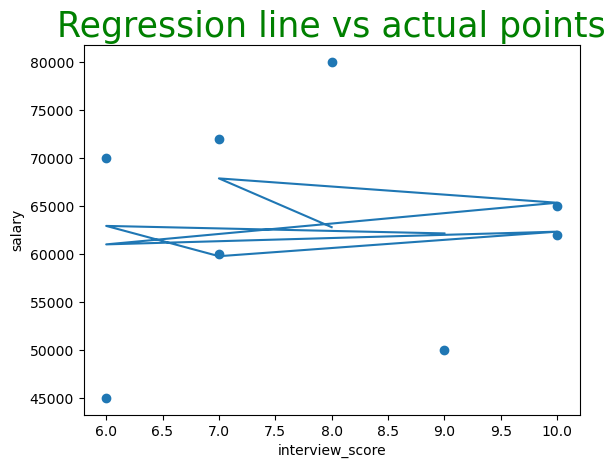

In [34]:
plt.title("Regression line vs actual points",fontsize = 25,color='green')
plt.ylabel("salary")
plt.xlabel("interview_score")
plt.scatter(X['interview_score'],pd.DataFrame(y,columns=['salary'])['salary'])
plt.plot(X['interview_score'],pd.DataFrame(reg.predict(X),columns=['salary'])['salary'])

## Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly = poly.fit_transform(X)

polyreg = LinearRegression()
polyreg.fit(X_poly,y)

LinearRegression()

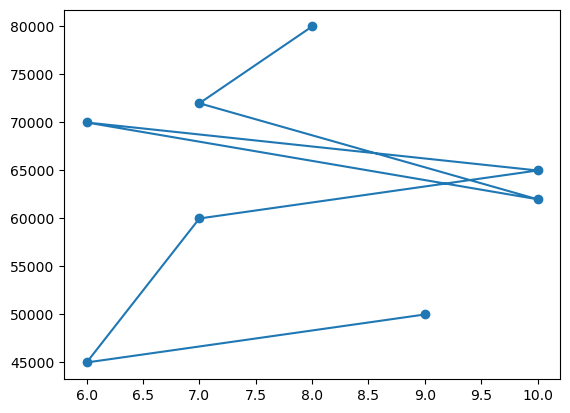

In [44]:
plt.scatter(X['interview_score'],y)
plt.plot(X['interview_score'],polyreg.predict(X_poly))

## Support Vector Machines

In [45]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X,y)

C:\Users\joben\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [46]:
svr.predict(X)

array([63499.90657861, 63499.64515117, 63499.1598383 , 63500.40456916,
       63499.93362667, 63499.59543089, 63500.57742945, 63499.72723865])

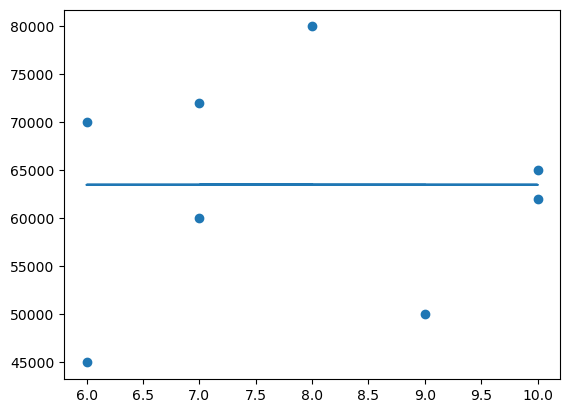

In [48]:
plt.scatter(X['interview_score'],y)
plt.plot(X['interview_score'],svr.predict(X))

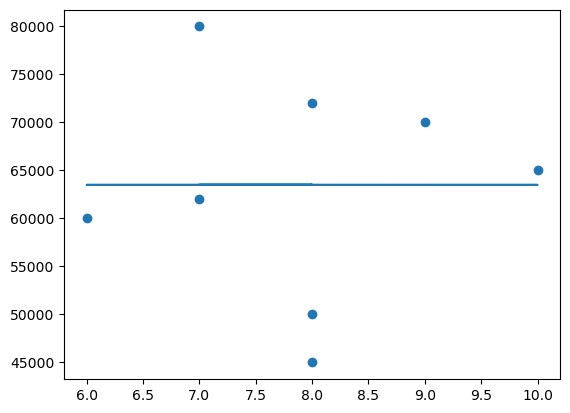

In [49]:
plt.scatter(X['test_score'],y)
plt.plot(X['test_score'],svr.predict(X))

## Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X,y)

DecisionTreeRegressor(random_state=0)

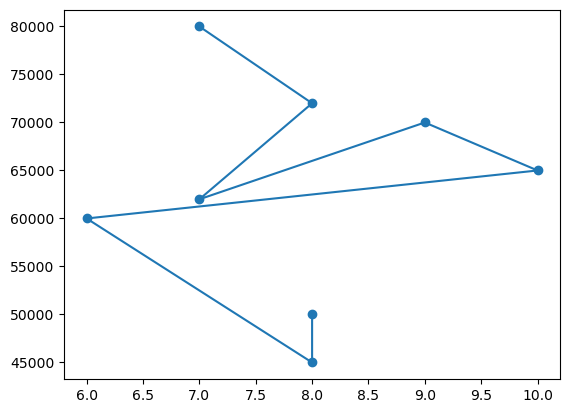

In [51]:
plt.scatter(X['test_score'],y)
plt.plot(X['test_score'],dtr.predict(X))

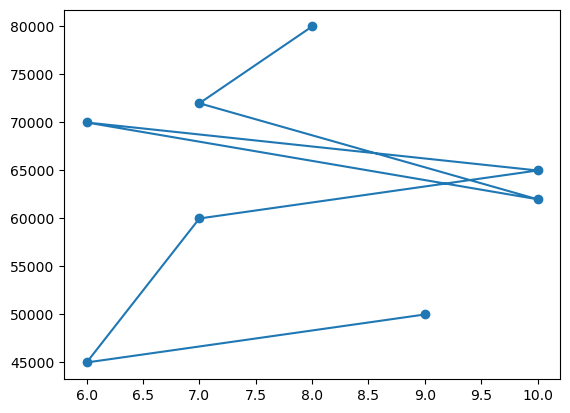

In [52]:
plt.scatter(X['interview_score'],y)
plt.plot(X['interview_score'],dtr.predict(X))

## Lasso-Ridge Regressor

In [54]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 3)
ridgeR.fit(X,y)

Ridge(alpha=3)

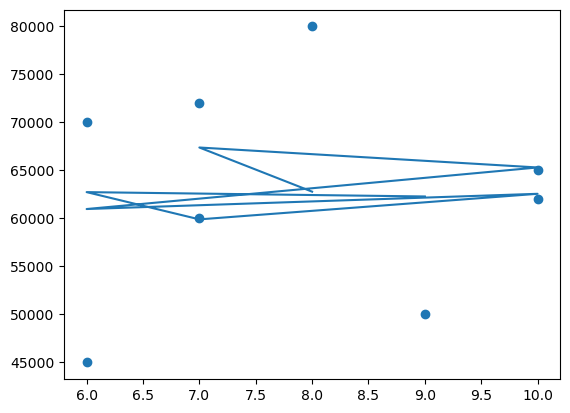

In [55]:
plt.scatter(X['interview_score'],y)
plt.plot(X['interview_score'],ridgeR.predict(X))

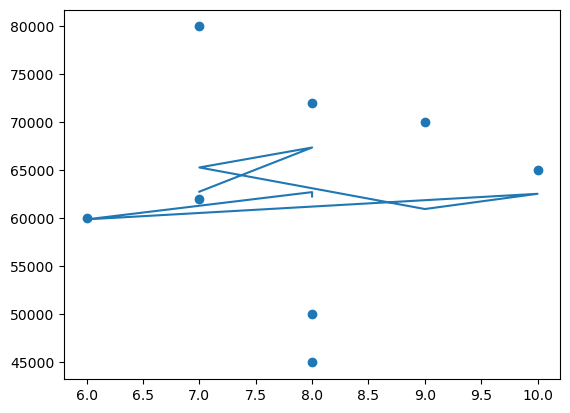

In [56]:
plt.scatter(X['test_score'],y)
plt.plot(X['test_score'],ridgeR.predict(X))